In [1]:
import pandas as pd

import numpy as np

In [2]:
df=pd.read_csv("C:/Users/chauh/Machine learning/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in columns:

    df[col]=le.fit_transform(df[col])

df.head()    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
df['parking'].unique()

array([2, 3, 0, 1], dtype=int64)

In [6]:
maping={'furnished':2,'semi-furnished':1,'unfurnished':0}

df['furnishingstatus']=df['furnishingstatus'].map(maping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [8]:
import matplotlib.pyplot as plt

import seaborn as sns

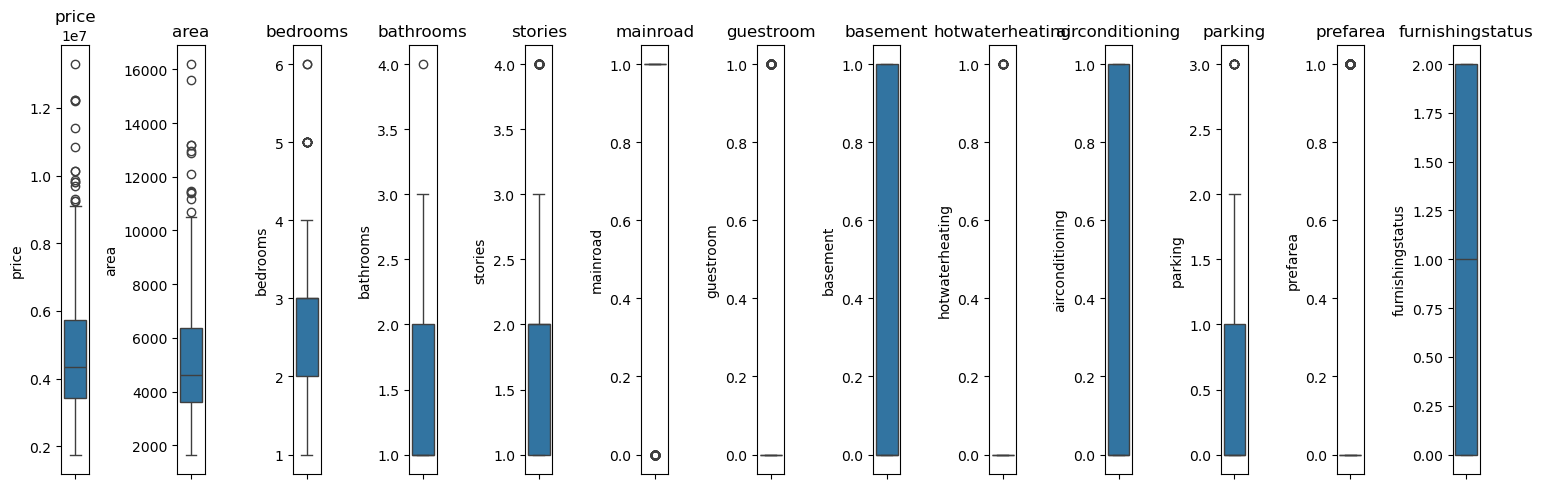

In [9]:
def boxplot(df):

    fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

    for i, col in enumerate(df.columns):

        sns.boxplot(y=df[col],ax=axs[i])

        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

boxplot(df)


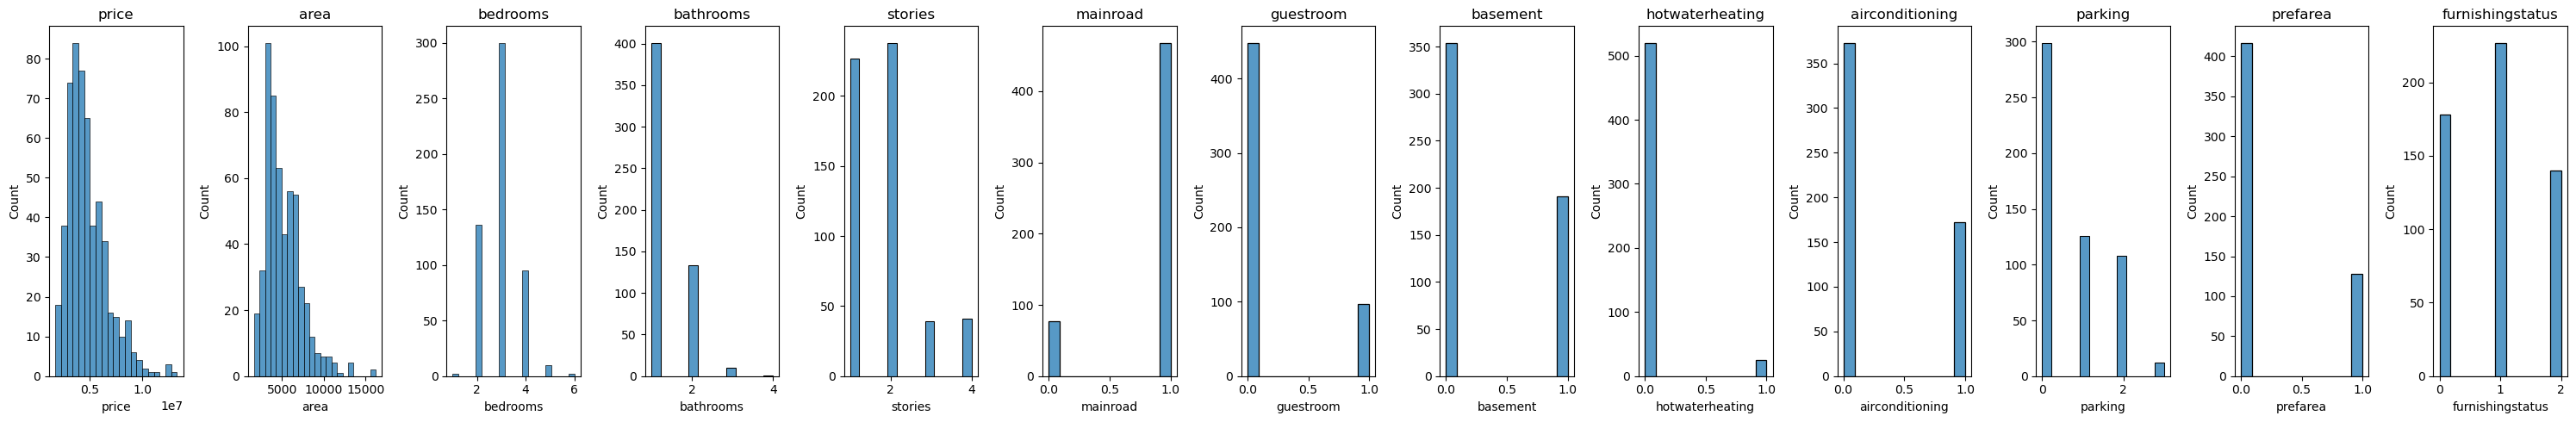

In [10]:
def histplot(df):

    fig,axs=plt.subplots(ncols=len(df.columns), figsize=(30,5))

    for i,col in enumerate(df.columns):

        sns.histplot(df[col],ax=axs[i])
        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

histplot(df)

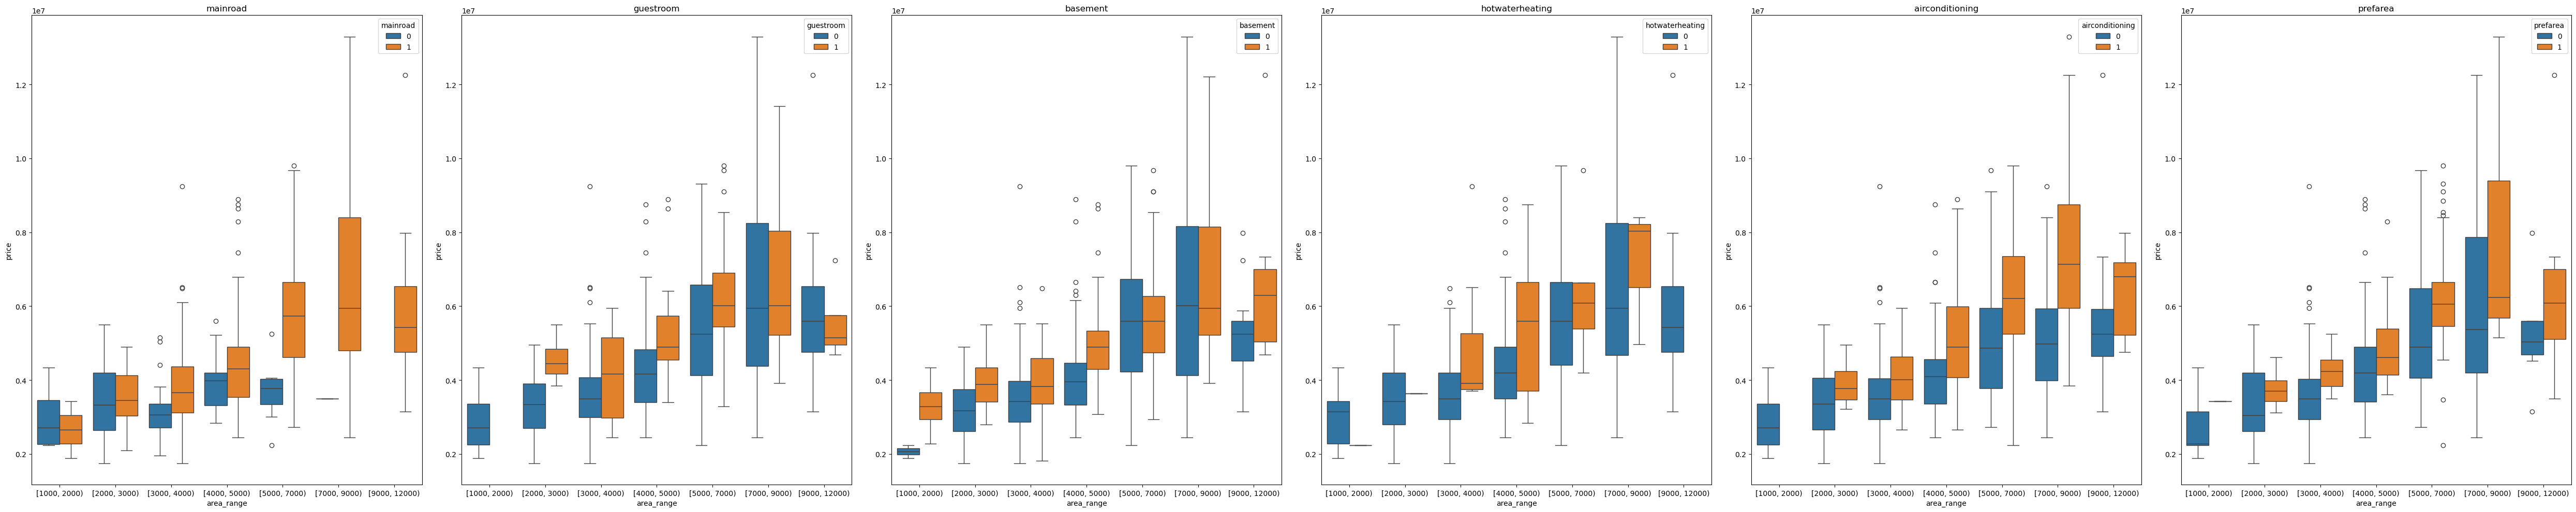

In [11]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

bins=[1000,2000,3000,4000,5000,7000,9000,12000]

df['area_range']=pd.cut(df['area'],bins=bins,right=False)

fig,axs=plt.subplots(ncols=len(cols),figsize=(50,10))

for i,col in enumerate(cols):

    sns.boxplot(data=df,x='area_range',y='price',hue=col,ax=axs[i])

    axs[i].set_title(col)

plt.tight_layout()

plt.show()

df=df.drop(columns=['area_range'])

In [12]:

df=df.drop(columns=['hotwaterheating'])

In [13]:
cols=['price','area']

def outlier_percentages(df,cols):

    outlier_percentages={}

    for col in cols:

        q1=df[col].quantile(0.25)

        q3=df[col].quantile(0.75)

        iqr=q3-q1
        
        lowerbound=q1-1.5*iqr

        upperbound=q3+1.5*iqr

        outliers=df[(df[col]<lowerbound) | (df[col]>upperbound)]

        outlier_percentages[col]=(len(outliers)/len(df)) *100

    return outlier_percentages

outlier_percentages(df,cols)

{'price': 2.7522935779816518, 'area': 2.2018348623853212}

<Axes: >

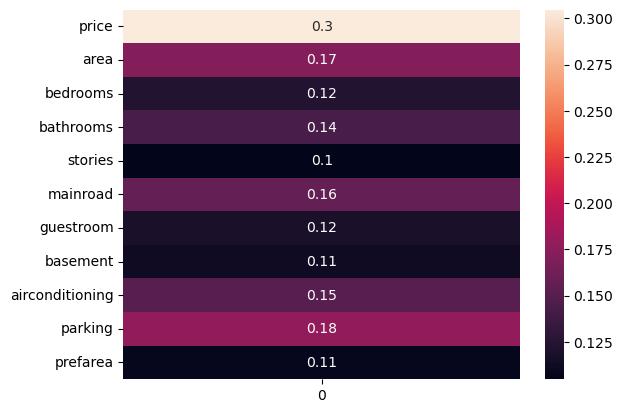

In [14]:
corr=df.corr().iloc[:-1,-1]

sns.heatmap(corr.values.reshape(-1,1),annot=True,yticklabels=corr.index)


In [15]:
df.shape

(545, 12)

In [16]:
df[df['bathrooms']>=4].count()

price               1
area                1
bedrooms            1
bathrooms           1
stories             1
mainroad            1
guestroom           1
basement            1
airconditioning     1
parking             1
prefarea            1
furnishingstatus    1
dtype: int64

In [17]:
df[df['bathrooms']>=4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,1,0,0,1,3,0,2


In [18]:
df[df['area']>9000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,1,0,1,0,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,2,1,2
82,6615000,10500,3,2,1,1,0,1,1,1,1,2
113,6083000,9620,3,1,1,1,0,1,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,1,2,0,1


In [19]:
df['price_per_sqft']=df['price']/df['area']

df['price_per_sqft'].describe()

count     545.000000
mean      993.326978
std       346.537025
min       270.395550
25%       745.370370
50%       952.380952
75%      1184.615385
max      2640.000000
Name: price_per_sqft, dtype: float64

In [20]:
cols=['price','area']

outlier_percentages(df,cols)

{'price': 2.7522935779816518, 'area': 2.2018348623853212}

In [21]:
cols=['price','area','price_per_sqft']

def remove_outliers(df):

    for col in cols:

        q1=df[col].quantile(0.25)

        q3=df[col].quantile(0.75)

        iqr=q3-q1

        lowerbound=q1-iqr*1.5
        upperbound=q3+iqr*1.5

        df=df[(df[col]>=lowerbound)&(df[col]<=upperbound)]

    return df

In [22]:
df=remove_outliers(df)

df.shape

(502, 13)

In [23]:
df['airconditioning'].unique()

array([0, 1])

In [24]:
outlier_percentages(df,cols) 

{'price': 0.796812749003984,
 'area': 0.796812749003984,
 'price_per_sqft': 0.5976095617529881}

In [25]:
df[df['area']>9000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
113,6083000,9620,3,1,1,1,0,1,0,2,1,2,632.328482
171,5250000,10269,3,1,1,1,0,0,0,1,1,1,511.247444
175,5250000,9800,4,2,2,1,1,0,0,2,0,1,535.714286
222,4760000,9166,2,1,1,1,0,1,1,2,0,1,519.310495
224,4760000,10240,2,1,1,1,0,0,1,2,1,0,464.843750
229,4690000,9667,4,2,2,1,1,1,0,1,0,1,485.155684
252,4515000,9860,3,1,1,1,0,0,0,0,0,1,457.910751
277,4305000,10360,2,1,1,1,0,0,0,1,1,1,415.540541
401,3500000,9500,3,1,2,1,0,0,0,3,1,0,368.421053


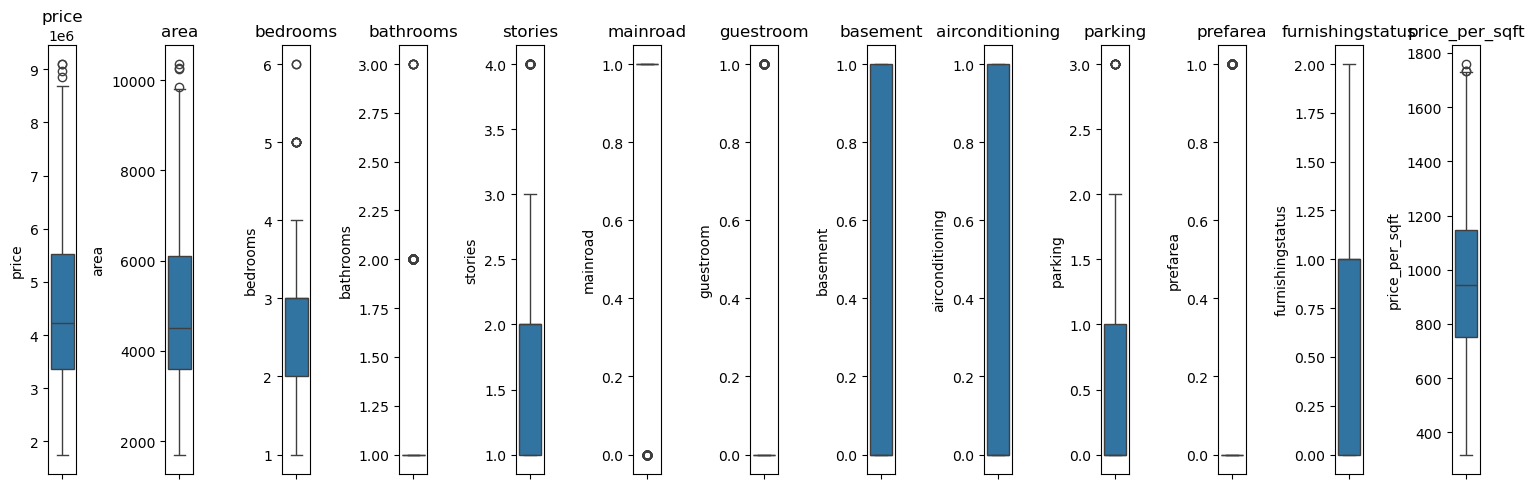

In [26]:
boxplot(df)

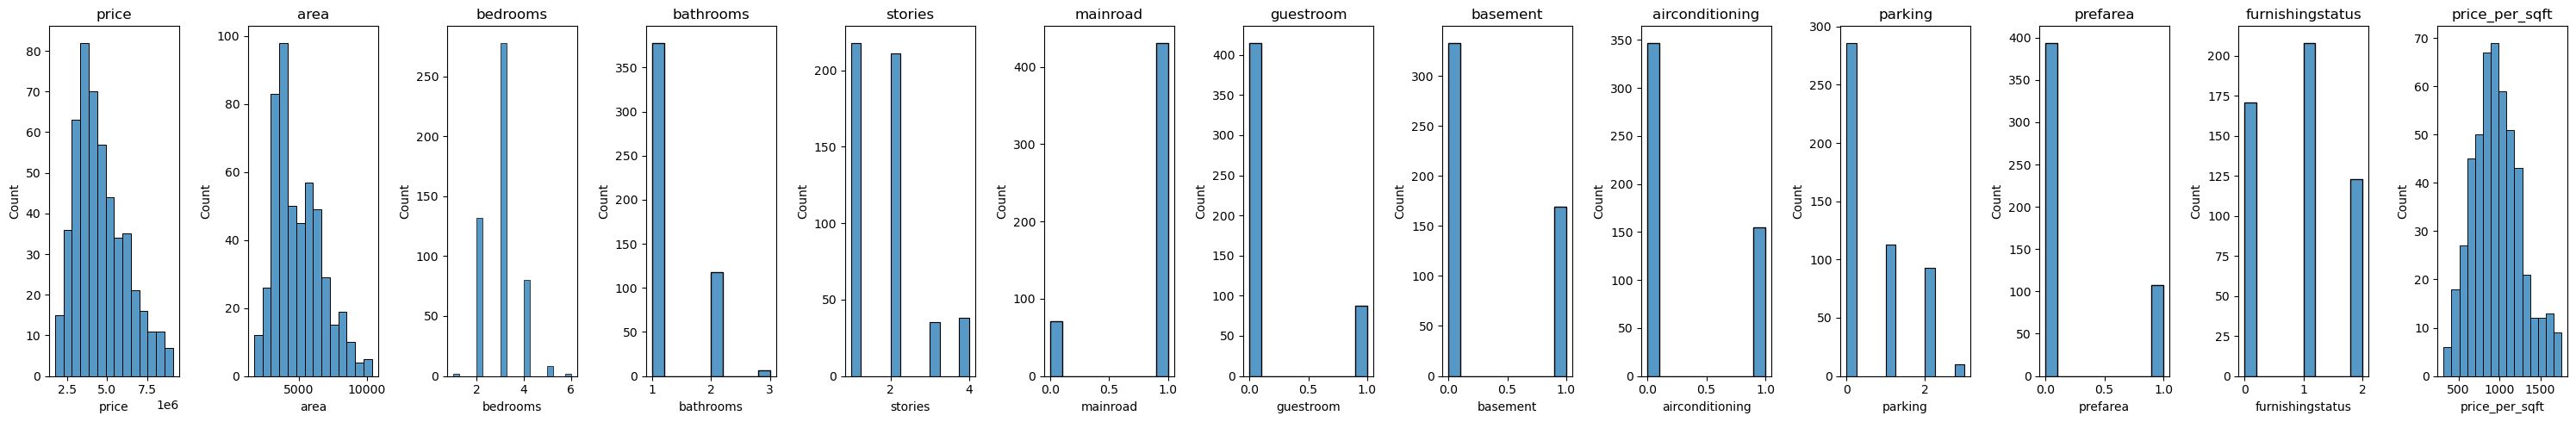

In [27]:
histplot(df)

In [28]:
df[(df['bedrooms']<2)|(df['bedrooms']>3) | (df['stories']>2) ]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
15,9100000,6000,4,1,2,1,0,1,0,2,0,1,1516.666667
16,9100000,6600,4,2,2,1,1,1,1,1,1,0,1378.787879
17,8960000,8500,3,2,4,1,0,0,1,2,0,2,1054.117647
25,8540000,6540,4,2,2,1,1,1,1,2,1,2,1305.810398
26,8463000,6000,3,2,4,1,1,1,1,0,1,1,1410.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2852500,5200,4,1,3,1,0,0,0,0,0,0,548.557692
523,2380000,2787,4,2,2,1,0,0,0,0,0,2,853.964837
528,2275000,3970,1,1,1,0,0,0,0,0,0,0,573.047859
534,2100000,3000,4,1,2,1,0,0,0,0,0,0,700.000000


In [29]:

df=df[~(df['bedrooms']<2)|(df['bedrooms']>3) | (df['stories']>2)]

In [30]:
df.shape

(500, 13)

In [31]:
outlier_percentages(df,cols)

{'price': 0.8, 'area': 0.8, 'price_per_sqft': 0.8}

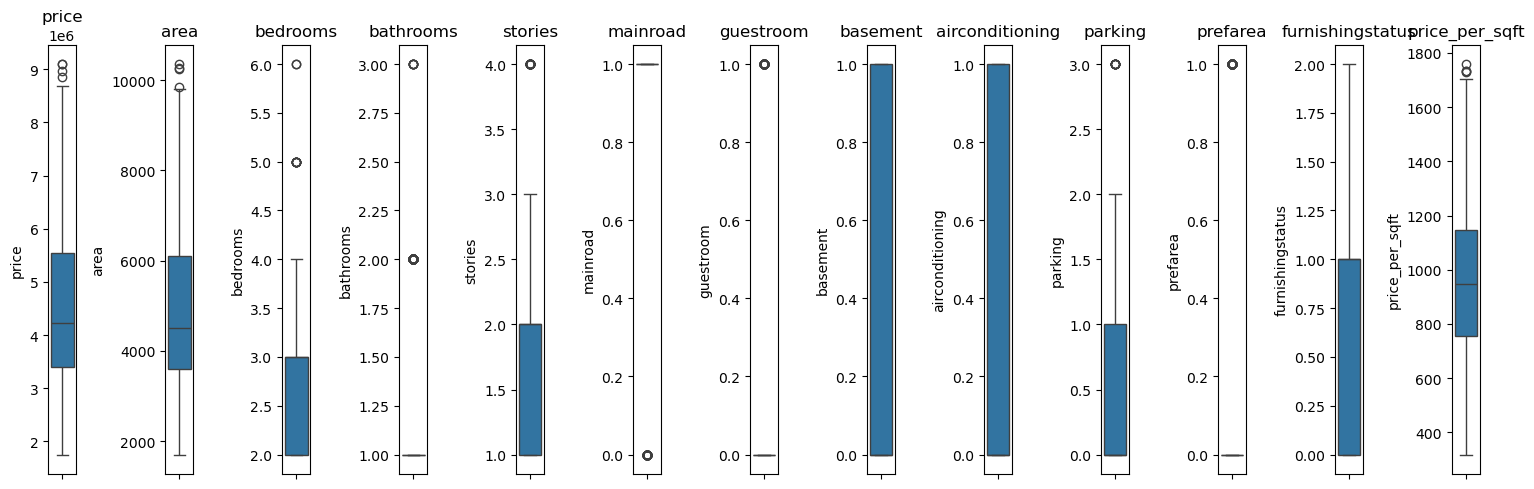

In [32]:
boxplot(df)

In [33]:
df=df[~(df['price_per_sqft']<690)]

In [34]:
df[(df['area']>1500)&(df['area']<4400)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
48,7455000,4300,3,2,2,1,0,1,0,1,0,0,1733.720930
70,6790000,4000,3,2,2,1,0,1,1,0,1,1,1697.500000
74,6650000,4040,3,1,2,1,0,1,0,1,0,2,1646.039604
75,6650000,4260,4,2,2,1,0,0,0,0,0,1,1561.032864
81,6615000,4000,3,2,2,1,0,1,1,1,0,1,1653.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2135000,3000,2,1,1,0,0,0,0,0,0,0,711.666667
533,2100000,2400,3,1,2,1,0,0,0,0,0,0,875.000000
534,2100000,3000,4,1,2,1,0,0,0,0,0,0,700.000000
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,1111.764706


<Axes: >

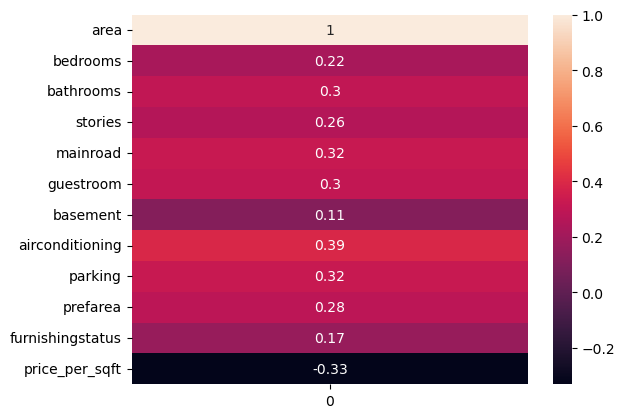

In [35]:
corr=df.corr().iloc[1:,1]

sns.heatmap(corr.values.reshape(-1,1),annot=True,yticklabels=corr.index)

In [36]:
x=df.drop(columns=['price_per_sqft','price'])

y=df['price']

In [37]:
print(x.shape)

print(y.shape)


(411, 11)
(411,)


In [38]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_scaled=ss.fit_transform(x)

x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

x_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.865605,1.426739,-0.619739,0.146872,0.397173,-0.483978,1.326043,-0.726554,1.647886,-0.559553,0.065188
1,1.251811,1.426739,1.417963,0.146872,0.397173,2.066212,1.326043,1.376360,0.438455,1.787142,-1.274420
2,2.474794,0.027241,1.417963,2.382582,0.397173,-0.483978,-0.754124,1.376360,1.647886,-0.559553,1.404796
3,1.135949,0.027241,1.417963,0.146872,0.397173,-0.483978,-0.754124,1.376360,0.438455,1.787142,0.065188
4,1.609050,0.027241,1.417963,-0.970984,0.397173,2.066212,1.326043,1.376360,1.647886,-0.559553,-1.274420


In [39]:
x_scaled.shape

(411, 11)

In [40]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

lr=LinearRegression()

lr.fit(xtrain,ytrain)

print(lr.score(xtest,ytest))

ypred=lr.predict(xtest)

print(mean_absolute_percentage_error(ytest,ypred)*100)

0.7482241376635266
13.969905945075881


In [42]:
def plot_scatter_chart(df,Abeds,Bbeds):

    setA = df[ (df.bedrooms==Abeds)]

    setB = df[ (df.bedrooms==Bbeds)]

    plt.figure(figsize = (5,4))

    plt.scatter(setA.area,setA.price,color='blue',label='Abeds', s=50)

    plt.scatter(setB.area,setB.price,marker='+', color='green',label='Bbeds', s=50)

    plt.xlabel("Total Square Feet Area")
    
    plt.ylabel("Price (Million US Dollars)")

    plt.legend()

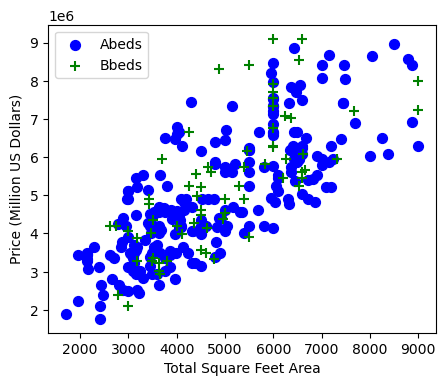

In [43]:
plot_scatter_chart(df,3,4)

In [44]:
def remove_bed_outliers(df):

    exclude_indices = np.array([])

    bhk_stats={}

    for bhk, bhk_df in df.groupby('bedrooms'):

        bhk_stats[bhk] = {

            'mean': np.mean(bhk_df['price_per_sqft']),

            'std': np.std(bhk_df['price_per_sqft']),
             'count': bhk_df.shape[0] 

        } 

    for bhk, bhk_df in df.groupby('bedrooms'):

        stats = bhk_stats.get(bhk - 1)

        if stats and stats['count'] > 5:

            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis = 'index')

dfnext = remove_bed_outliers(df)

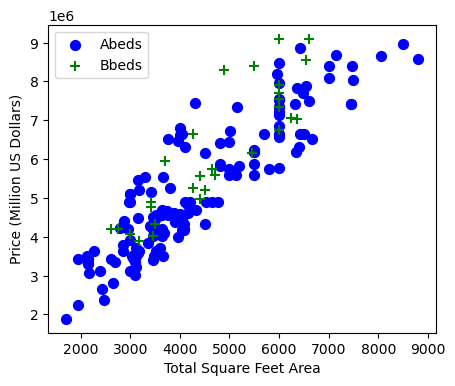

In [45]:
plot_scatter_chart(dfnext,3,4)

In [46]:
x=dfnext.drop(columns=['price_per_sqft','price'])

y=dfnext['price']

ss=StandardScaler()

x_scaled=ss.fit_transform(x)

x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

#x_scaled.head()

xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=0)


In [47]:
lr=LinearRegression()

lr.fit(xtrain,ytrain)
print("Linear Regression R2 Score:", lr.score(xtest, ytest))
ypred = lr.predict(xtest)
print("Linear Regression MAPE:", mean_absolute_percentage_error(ytest, ypred) * 100)

#print(mean_absolute_percentage_error(ytest,ypred)*100)

Linear Regression R2 Score: 0.8332029928764235
Linear Regression MAPE: 10.385432235107503


from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score



cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)



cross_val_score(LinearRegression(), x_scaled, y, cv=cv) 

In [49]:
!pip install xgboost

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [142]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                 
                # Add hyperparameters for tuning if required
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'C': [0.1, 1, 10]
                # Add hyperparameters for tuning if required
            }
        },
        'RandomForestR': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 5, 10]
                # Add hyperparameters for tuning if required
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                  'alpha': [0.1, 1, 10]
                # Add hyperparameters for tuning if required
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
               'alpha': [0.01, 0.1, 1],
                'selection': ['random', 'cyclic']
            }
        },
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror'),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
               'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=1, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

best_model_df = find_best_model_using_gridsearchcv(x_scaled, y)
print(best_model_df)

# y: Target variable



               model  best_score  \
0  linear_regression    0.800801   
1                SVR   -0.059330   
2      RandomForestR    0.799544   
3              Ridge    0.800873   
4              lasso    0.800801   
5            XGBoost    0.770926   
6      decision_tree    0.698390   

                                         best_params  
0                                                 {}  
1                      {'C': 10, 'kernel': 'linear'}  
2           {'max_depth': None, 'n_estimators': 100}  
3                                       {'alpha': 1}  
4                {'alpha': 1, 'selection': 'cyclic'}  
5         {'learning_rate': 0.1, 'n_estimators': 50}  
6  {'criterion': 'squared_error', 'max_depth': 5,...  


xg=XGBRegressor(objective='reg:squarederror')

xg.fit(xtrain,ytrain)

ypred=xg.predict(xtest)

print("XGBoost R2 Score:", r2_score(ytest, ypred))
print("XGBoost MSE:", mean_squared_error(ytest, ypred))
print("XGBoost MAPE:", mean_absolute_percentage_error(ytest, ypred) * 100)

In [145]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Replace XGBRegressor with Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust the 'alpha' hyperparameter

# Fit the Lasso model with the training data
lasso.fit(xtrain, ytrain)

# Predict with the Lasso model
ypred = lasso.predict(xtest)

# Evaluate the Lasso model
print("Lasso R2 Score:", r2_score(ytest, ypred))
print("Lasso MSE:", mean_squared_error(ytest, ypred))
print("Lasso MAPE:", mean_absolute_percentage_error(ytest, ypred) * 100)


Lasso R2 Score: 0.8332030136145634
Lasso MSE: 425573660142.9599
Lasso MAPE: 10.385429884098302


In [147]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
15,9100000,6000,4,1,2,1,0,1,0,2,0,1,1516.666667
16,9100000,6600,4,2,2,1,1,1,1,1,1,0,1378.787879
17,8960000,8500,3,2,4,1,0,0,1,2,0,2,1054.117647
19,8855000,6420,3,2,2,1,0,0,1,1,1,1,1379.283489
21,8680000,7155,3,2,1,1,1,1,1,2,0,0,1213.137666


In [166]:
df[(df['bedrooms']-1<df['guestroom'])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft


In [150]:
import pickle 

In [152]:
# Save the scaler and DataFrame to pickle files
pickle_filename_scaler = "scaler.pkl"
pickle_filename_data = "housing_data.pkl"

In [154]:
with open("scaler.pkl", 'rb') as file:
    loaded_scaler = pickle.load(file)

with open("xgboost_model.pkl", 'wb') as file:
    pickle.dump(xg, file)

with open("xgboost_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

In [158]:
with open("lasso_model.pkl", 'wb') as file:
    pickle.dump(lasso, file)

print("Lasso model saved as lasso_model.pkl")

Lasso model saved as lasso_model.pkl


In [160]:
# Load the saved Lasso model
with open("lasso_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

print("Lasso model loaded successfully")

Lasso model loaded successfully


In [162]:
new_data = [[9960,	3,	2,	2,	1	,0,	1,	0,	2	,1	,1]]
new_scaled = loaded_scaler.transform(new_data)
print("Transformed New Data:", new_scaled)

Transformed New Data: [[ 4.0703952   0.3018051   1.42955119  0.11908728  0.39957961 -0.45883147
   1.36930639 -0.74787836  1.75013609  1.96012889  0.00957782]]


C:\Users\chauh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [164]:
predicted_price = loaded_model.predict(new_scaled)

print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 9745941.966017146


C:\Users\chauh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
